# Изучение закономерностей, определяющих успешность игр 🎮

## Содержание

[Описание проекта](#project_summary)  
[Изучение данных из файла и их предобработка](#read_data)  
[Анализ данных](#analisis)  
[Портрет пользователя каждого региона](#portrait)  
[Описание распределений. Проверка гипотез](#hipothesis)  
[Общий вывод](#total_conclusion)  

<a id='project_summary'></a>
## Описание проекта

**Задача**  
Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Используя исторические данные из открытых источников нам нужно выявить определяющие успешность игры закономерности. Это поможет планировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нам необходимо провести обзор данных, устранить в них ошибки и заполнить пропуски. Далее займемся изучением динамики выпуска игр, определим жизненный цикл платформы и выберем актуальный период для прогноза. Выявим перспективные для 2017 года платформы и жанры игр. Составим портрет пользователя каждого региона (Северная Америка, Европа и Япония).

**Цель исследования**  
Опираясь на данные из открытых источников необходимо определить наиболее перспективные для 2017 года платформы и жанры игр. Составим портрет типичного пользователя изучаемых регионов и дадим рекомендации по планированию рекламных кампаний.

**Ход исследования**  
Данные о продажах игр получим из предоставленного нам файла. Перед проверкой гипотез и поиском ответов на поставленные вопросы понадобится обзор данных. Мы проверим данные на ошибки и оценим их влияние на исследование. Затем на на этапе предобработки данных приведем массив данных к пригодному для исследования виду, переименуем столбцы, изменим типы данных, добавим расчетные столбцы, произведём необходимые группировки. Применим графические методы и сводные таблицы для представления полученных результатов. Проверим две гипотезы о средних пользовательских рейтингах по некоторым платформам и жанрам. Таким образом, исследование пройдёт в четыре этапа:

1) Обзор данных и их предобработка;  
2) Анализ данных;  
3) Портрет пользователя каждого региона;  
4) Описание распределений. Проверка гипотез.

<a id='read_data'></a>
## Изучение данных из файлов и их предобработка 

Для начала произведём импорт всех необходимых нам библиотек, а также зафиксируем количество отображаемых колонок таблицы:

In [1]:
# импорт библиотеки pandas
import pandas as pd

#импорт библиотеки numpy для операций с массивами
import numpy as np

# импорт библиотеки визуализации seaborn
import seaborn as sns

# импорт библиотеки matplotlib для продвинутой работы с графиками
import matplotlib.pyplot as plt

# импорт библиотеки для проведения статистических тестов
from scipy import stats as st

# импорт библиотеки для игнорирования предупреждений
import warnings
warnings.filterwarnings("ignore")

# зафиксируем число отображаемых колонок, чтобы они не прятались у нас за тремя точками
pd.set_option('display.max_columns', 50)

___
Прочитаем данные из файла. Выведем на экран первые 5 строк датасета.

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Согласно документации к данным, в датафрейме содержится следующая информация:  

**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Сразу можно заметить в названиях столбцов нарушение хорошего стиля. Исправим это, приведя их к нижнему регистру:

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посмотрим главные характеристики таблицы, воспользовавшись методом *info()*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы имеем дело с объёмным массивом информации с большим количеством строк, некоторые позиции имеют пропущенные значения. Графу *'year_of_release'* удобно трансформировать в тип данных *int* (так как в столбце нет информации о месяце и дне, то тип *datetime* нам не понадобится):

In [5]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['year_of_release'].dtypes

Int64Dtype()

Изучим описательную статистику посредством метода *describe()*:

In [6]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Сразу можно сказать, что в таблице приведена информация за период с 1980 по 2016 годы. Нулевых продаж по всем регионам меньше половины, а в случае Японии более 75% выпущенных игр расходилось тиражом в 40 000 проданных копий и более.

Проверим, не содержит ли наша таблица явные дубликаты:

In [7]:
df.duplicated().sum()

0

Дубликатов не оказалось.  
Посчитаем, сколько в нашей таблице пропущенных значений. Итог выведем в % к общему количеству строк в датасете:

In [8]:
round(df.isna().sum() / df.shape[0]*100, 2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

Так как пропусков в названии игры и жанре очень мало, их можно удалить:

In [9]:
df = df.dropna(subset = ['name', 'genre']).reset_index(drop=True)
print(df['name'].isna().sum())
print(df['genre'].isna().sum())

0
0


Заполним пропуски в рейтинге от организации ESRB. Предположим, что отсутствующие значения здесь говорят об отсутствии присвоенной возрастной категории, заменим их на 'not determined' (для удобства сократим до 'nd'):

In [10]:
df['rating'] = df['rating'].fillna('nd')
print(df['rating'].isna().sum())

0


Заполнять пропуски в оценках критиков и пользователей нецелесообразно, так как их % очень велик. Такое действие может привести к значительному искажению результатов исследования, эти показатели субъективны и индивидуальны, "угадать" их - занятие бесперспективное. Подобные пропуски могли образоваться в силу отсутствия данной информации в общем доступе, или человек, формировавший для нас таблицу их просто не нашёл.  

Посмотрим поближе на столбец *user_score*. Данные в нем похожи на числа, но тип данных в столбце определился как строковый. Выведем уникальные значения и попробуем понять, в чем причина:

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Действительно, среди значений мы можем заметить 'tbd' (to be determined). Целесообразно заменить эти значения на пропуски, так как неопределенная оценка по сути и значит, что её нет:

In [12]:
print('Количество неопределенных оценок - ', len(df[df['user_score'] == 'tbd']))
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print('Тип данных в графе оценок пользователей - ', df['user_score'].dtypes)
print('Процент пропущенных значений оценок пользователей - ', round(df['user_score'].isna().sum()/ df.shape[0]*100, 2), '%')

Количество неопределенных оценок -  2424
Тип данных в графе оценок пользователей -  float64
Процент пропущенных значений оценок пользователей -  54.59 %


Пропуски в годах выпуска игр занимают лишь 1,6%, поэтому мы можем их удалить, не причинив при этом ущерб исследованию:

In [13]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release'].isna().sum()

0

Далее добавим в таблицу ещё один показатель, который понадобится нам в анализе. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [14]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13080,Rock 'N Roll Racing,GBA,2003,Racing,0.03,0.01,0.00,0.00,80.0,9.4,E,0.04
15860,Ten Pin Alley 2,GBA,2004,Sports,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
11603,Little League World Series Baseball: Double Play,DS,2010,Sports,0.07,0.00,0.00,0.01,NaN,NaN,E,0.08
13801,Minority Report: Everybody Runs,GBA,2002,Action,0.03,0.01,0.00,0.00,54.0,NaN,T,0.04
13000,Chousoku Henkei Gyrozetter: Albatross no Tsubasa,3DS,2013,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,nd,0.05


### Вывод
Мы произвели обзор данных. Привели названия столбцов к хорошему стилю, типы данных к более удобным. Определили пропуски и по необходимости их заполнили, устранили ошибки в данных. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

<a id='analisis'></a>
## Анализ данных
Закончив обзор данных и их предобработку, можно перейти к анализу данных. Посмотрим, сколько игр выпускалось в разные годы. Необходимо учесть, что одна и та же игра могла выходить для нескольких платформ. Отобразим результат расчетов графически:

,year_of_release,name,platform
2784,2002,Dino Stalker,1
10881,2012,[Prototype 2],3
3569,2003,Medal of Honor: Infiltrator,1
9198,2010,Madden NFL 11,4
3684,2003,Risk: Global Domination,1


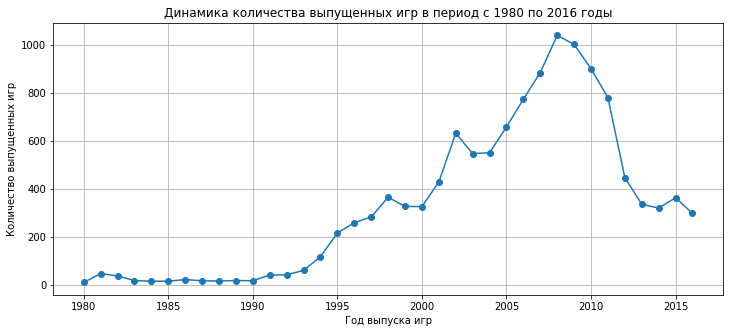

In [15]:
# сгруппируем данные по году и названию игры, посчитаем на скольких платформах выходила игра в пределах каждого года
year_release_games = df.groupby(['year_of_release','name'])['platform'].count().reset_index()
display(year_release_games.sample(5))
# ещё раз сгруппируем данные уже только по году и посчитаем количество названий вышедших игр в предалах каждого года, построим график
year_release_games.groupby(['year_of_release'])['name'].count().plot(
grid=True, figsize=(12,5), style='o-')
plt.title('Динамика количества выпущенных игр в период с 1980 по 2016 годы')
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество выпущенных игр');

График демонстрирует нам, что широкое развитие сфера игропроизводства начала получать примерно с 1995 года. Пик её развития пришёлся на 2008 год. Интересно посмотреть, как менялись продажи по платформам. Оставим в таблице более активные годы игровой индустрии и найдём платформы с наибольшими суммарными продажами:

In [16]:
df = df[df['year_of_release'] >= 1995]
df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       721.55
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       239.79
N64      218.01
GC       196.73
XOne     159.32
GB       139.90
WiiU      82.19
PSV       53.81
SNES      49.59
SAT       29.94
DC        15.95
WS         1.42
NG         0.43
TG16       0.16
3DO        0.08
PCFX       0.03
Name: total_sales, dtype: float64

Выделим 10 платформ лидирующих по продажам перед всеми остальными. Изучим динамику продаж по этим платформам, построив график суммарных продаж для каждой из них:

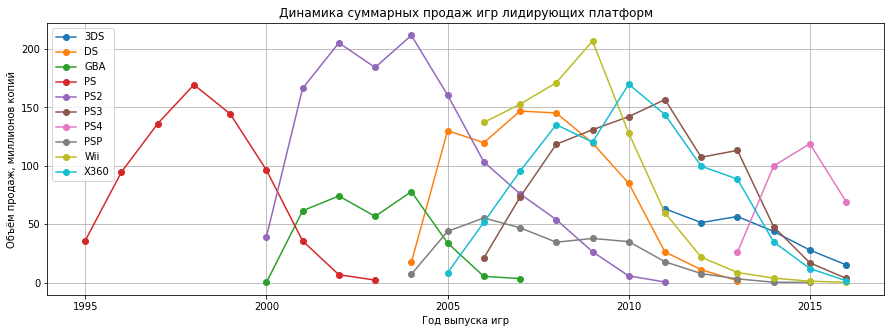

In [17]:
list_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']
df.query('platform in @list_platform').groupby(['platform', 'year_of_release'])['total_sales'].sum(
).unstack('platform').plot(grid=True, figsize=(15,5), style='o-')
plt.legend()
plt.title('Динамика суммарных продаж игр лидирующих платформ')
plt.xlabel('Год выпуска игр')
plt.ylabel('Объём продаж, миллионов копий');

По графику можно заметить, что, например, платформы "PlayStation" обновлялись каждые 5-8 лет. Если прослеживать обновление всех топовых платформ, то динамика следующая: в 2000-м появилось две платформы (спустя 5 лет от запуска "PS"), ещё две платформы появились в 2004-м, в 2006 ещё две, в 2011-м одна и в 2013-м ещё одна. Жизненный цикл платформы в среднем 8-10 лет.  
Исходя из текущих наблюдений, приняв во внимание динамику стремительного развития исследуемой отрасли, определим актуальный период для построения прогноза на 2017 год - возьмём последние два года. Данные по 2016 году могу быть неполными, но они же и самые актуальные. Построим графики динамики продаж по платформам в период с 2015 по 2016 годы:

platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
PSP       0.12
Name: total_sales, dtype: float64

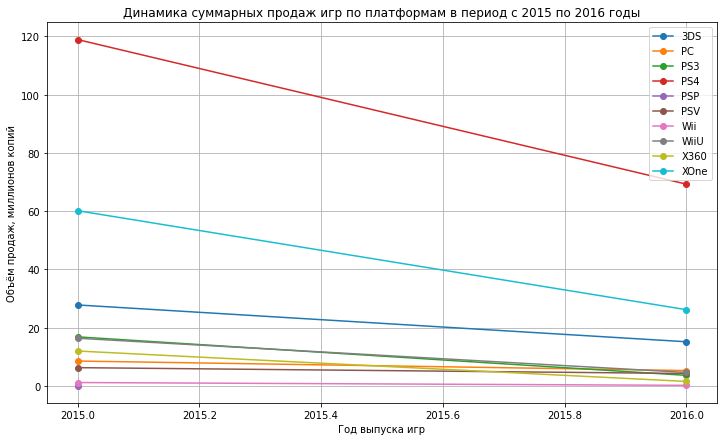

In [18]:
df[df['year_of_release'] >= 2015].groupby(['platform', 'year_of_release'])[
    'total_sales'].sum().unstack('platform').plot(grid=True, figsize=(12,7), style='o-')
plt.legend()
plt.title('Динамика суммарных продаж игр по платформам в период с 2015 по 2016 годы')
plt.xlabel('Год выпуска игр')
plt.ylabel('Объём продаж, миллионов копий');
# посчитаем суммарные продажи для каждой платформы в 2015 году, т.к по нему данные полные
display(df[df['year_of_release'] == 2015].groupby(['platform'])['total_sales'].sum().sort_values(ascending=False))

По графику видно, что продажи по платформам "PS3", "WiiU", "X360", "PC", "PSV", "Wii" к 2016 году сильно упали, поэтому можно сделать вывод, что в 2017 году продажи игр для этих платформ ещё больше снизятся. Платформа "3DS" в 2015 году начала терять продажи, но они всё ещё остаются достаточно высокими - больше 27.78 млн.копий. Можно полагать, что ближайшие пару лет большого падения продаж игр для этой платформы не произойдёт. Самыми перспективыми для 2017 года с точки зрения продаж выглядят "XOne" и "PS4", так как это самые "молодые" платформы с самыми высокими продажами.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по самым перспективным платформам. Снова возьмём данные с 2015 года.

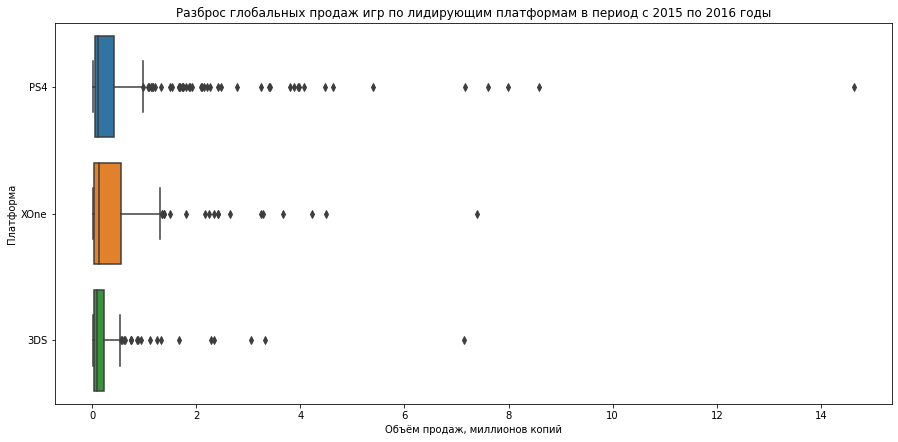

In [19]:
top_platform = df[(df['year_of_release'] >= 2015) & ((df['platform'] == '3DS')|(df['platform'] == 'XOne')|(
    df['platform'] == 'PS4'))]
plt.figure(figsize=(15,7))
sns.boxplot(x = top_platform['total_sales'], y = top_platform['platform'])
plt.title('Разброс глобальных продаж игр по лидирующим платформам в период с 2015 по 2016 годы')
plt.xlabel('Объём продаж, миллионов копий')
plt.ylabel('Платформа');

Полученный график не очень информативен, он демострирует нам по большей части выбросы. Чтобы получше рассмотреть сами "ящики с усами" добавим ограничение по оси 'x':

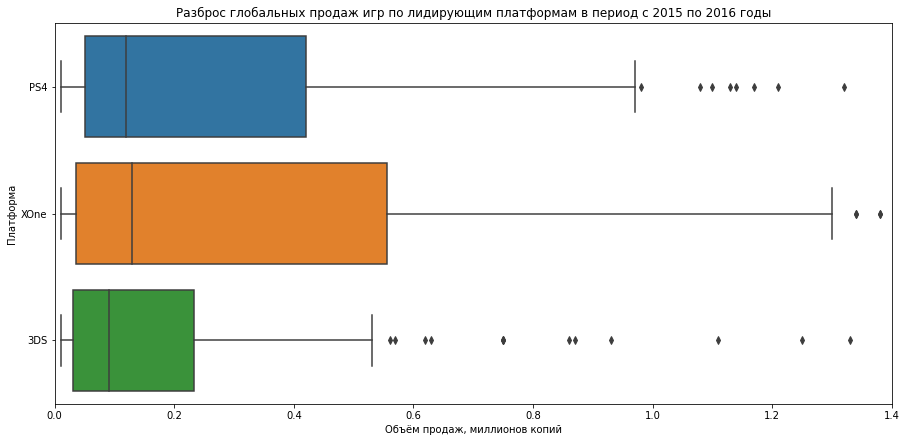

In [20]:
top_platform = df[(df['year_of_release'] >= 2015) & ((df['platform'] == '3DS')|(df['platform'] == 'XOne')|(
    df['platform'] == 'PS4'))]
plt.figure(figsize=(15,7))
sns.boxplot(x = top_platform['total_sales'], y = top_platform['platform'])
plt.xlim(0, 1.4)
plt.title('Разброс глобальных продаж игр по лидирующим платформам в период с 2015 по 2016 годы')
plt.xlabel('Объём продаж, миллионов копий')
plt.ylabel('Платформа');

Медианное значение глобальных продаж у платформ "PS4" и "XOne" находятся приблизительно на одинаковом уровне, у платформы "3DS" оно ниже. Длина 75% квантилей отличается в значительной степени. Таким образом, платформы "PS4" и "XOne" имели более устойчивый высокий уровень продаж с сравнении с платформой "3DS". Объёмы продаж игр на уровне от 250 тыс.копий наблюдаются здесь гораздо чаще. Исходя из этого можно делать вывод о перспективности продаж для платформ "PS4" и "XOne".

Посмотрим, как влияют на продажи внутри платформы "PS4" отзывы пользователей и критиков. Сначала отсечем выбросы, а затем построим диаграмму рассеяния, и посчитаем корреляцию между отзывами и продажами.  
Для выявления выбросов воспользуемся диаграммой размаха, построенной по значениям общих продаж, оценок пользователей и оценок критиков. После каждого "отсечения" посмотрим количество оставшихся значений, чтобы проконтролировать % отброшенных.

392

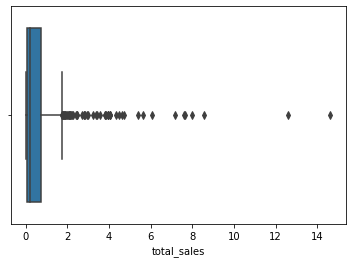

In [21]:
ps4 = df[df['platform'] == 'PS4'][[
    'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']]
display(len(ps4))
sns.boxplot(x = 'total_sales', data = ps4);

Отбросим из выборки значения продаж на уровне, где точки выбросов начинают заметно "редеть" - 5 миллионов копий. Найдём выбросы в оценках критиков:

382

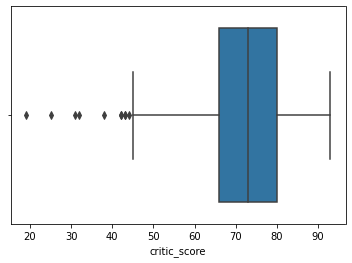

In [22]:
ps4 = ps4.query('total_sales <= 5')
display(len(ps4))
sns.boxplot(x = 'critic_score', data = ps4);

Оценки критиков ниже 42 баллов выглядят нетипичными для нашей выборки - отсечём их. Посмотрим выбросы по оценкам пользователей:

377

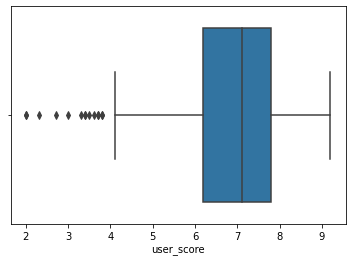

In [23]:
ps4 = ps4.loc[(ps4['critic_score'].isna()==True)|(ps4['critic_score'] >= 42)]
display(len(ps4))
sns.boxplot(x = 'user_score', data = ps4);

Отсечём самые низкие оценки пользователей на уровне до 3.2 баллов. Посмотрим, сколько значений осталось в выборке для нашего исследования.

In [24]:
ps4 = ps4.loc[(ps4['user_score'].isna()==True)|(ps4['user_score'] >= 3.2)]
display(len(ps4))

372

В результате отброшенными оказись 20 строк или 5,1% (что немного), проследить тесноту связи между исследуемыми показателями теперь можно будет нагляднее. Рассчитаем матрицу корреляции и поместим её на тепловую карту:

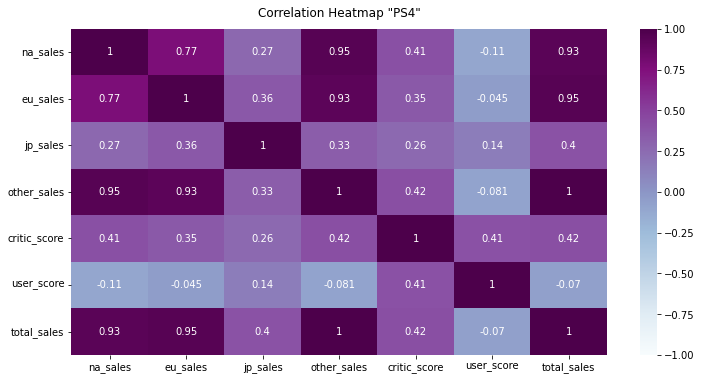

In [25]:
# отобразим матрицу корреляции на тепловой карте
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(ps4.corr(), vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Correlation Heatmap "PS4"', fontdict={'fontsize':12}, pad=12);

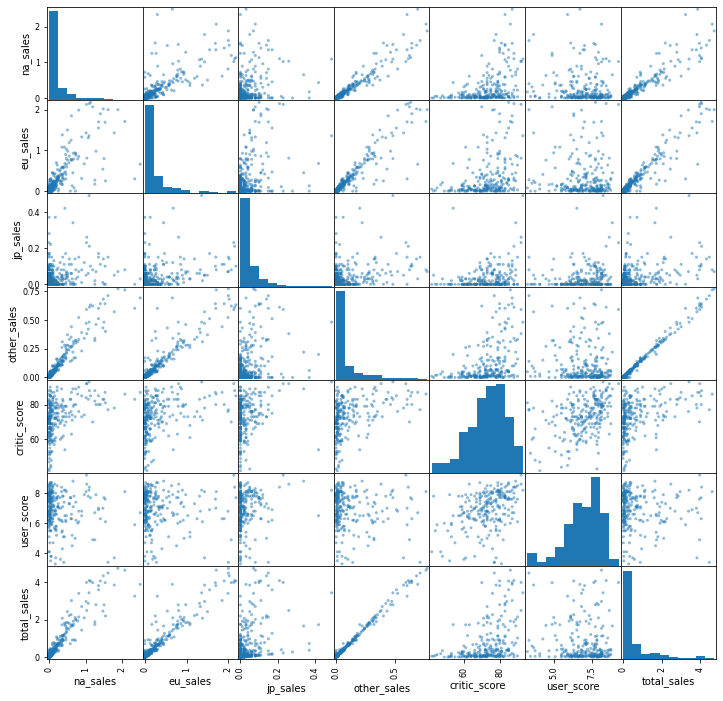

In [26]:
# графически взаимосвязи показателей можно также изобразить с помощью матрицы диаграмм рассеяния
pd.plotting.scatter_matrix(ps4, figsize=(12,12), alpha = 0.5);

Коэффициенты корреляции демонстрируют достаточно явную связь между глобальными продажами игр внутри платформы "PS4" и оценками критиков. Коэффициент корреляции между продажами игр и оценками пользователей очень невысокий, можно сделать вывод, что их влияние незначительно.  
Интересно посмотреть схожа ли картина по двум другим лидирующим платформам?

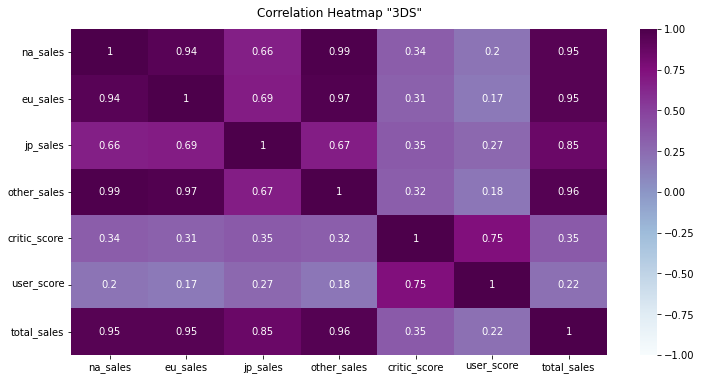

In [27]:
ds = df[df['platform'] == '3DS'][[
    'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']]
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(ds.corr(), vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Correlation Heatmap "3DS"', fontdict={'fontsize':12}, pad=12);

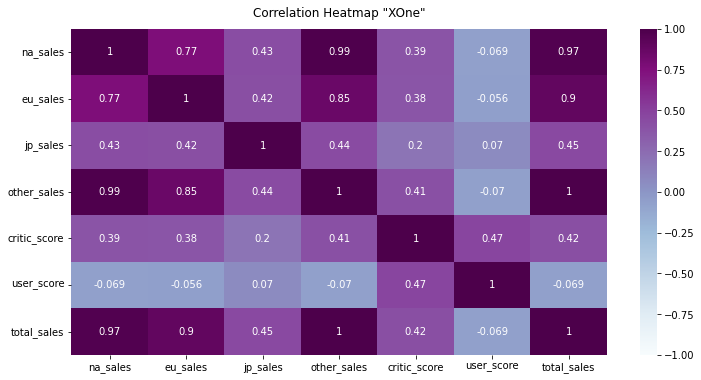

In [28]:
xone = df[df['platform'] == 'XOne'][[
    'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'total_sales']]
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(xone.corr(), vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Correlation Heatmap "XOne"', fontdict={'fontsize':12}, pad=12);

Можно заметить, что связь между глобальными продажами игр внутри платформы "3DS" и оценками критиков немного слабее,чем на платформе "PS4", и гораздо более явная связь присутствует с оценками пользователей. В случае платформы "XOne" картина связей очень похожа на ту, что демонстрирует нам выборка "PS4".

На примере трёх самых перспективных в 2016 году платформ посмотрим на общее распределение игр по жанрам. Отразим данные в виде сводной таблицы:

In [29]:
# сгруппируем данные по жанру и названию игры, посчитаем итоговые продажи каждой игры
genres = top_platform.groupby(['genre','name'])['total_sales'].sum().reset_index()
# добавим столбец-счетчик для подсчета количества игр, представленных в каждом жанре
genres['games_count'] = 1
# ещё раз сгруппируем данные уже только по жанру и посчитаем количество названий вышедших игр и суммарные продажи в разрезе жанров
genres = genres.groupby(['genre'])['total_sales', 'games_count'].sum()
# добавим столбец с расчетом глобальных продаж за игру в каждом жанре
genres['sales_per_game'] = genres['total_sales']/genres['games_count']
display(genres)

,total_sales,games_count,sales_per_game
genre,,,
Action,80.42,170,0.473059
Adventure,8.07,33,0.244545
Fighting,10.17,19,0.535263
Misc,7.33,31,0.236452
Platform,3.54,11,0.321818
Puzzle,0.70,5,0.140000
Racing,10.37,16,0.648125
Role-Playing,47.45,65,0.730000
Shooter,92.77,34,2.728529


Самые высокие продажи игр оказались в жанре "action". Данный сегмент игрового рынка представлен самым большим разнообразием игр. Лидирующие позиции по уровню глобальных продаж также занимают жанры "Shooter", "Role-Playing" и "Sports".  
Для большей наглядности приведём данные в виде круговой диаграммы: 

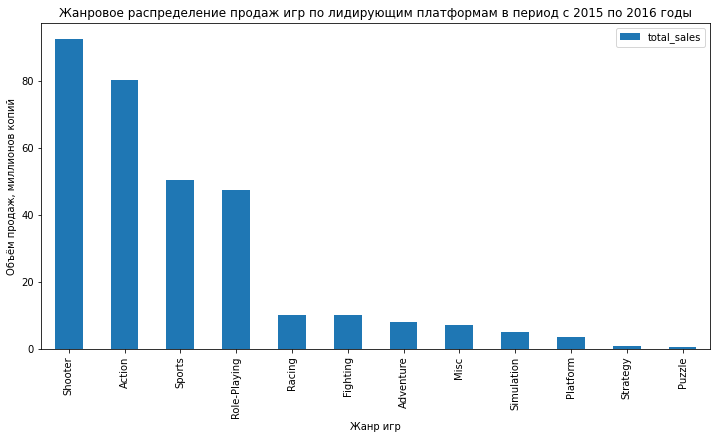

In [30]:
genres.groupby(['genre']).agg({'total_sales':'sum'}).sort_values(
    by='total_sales', ascending = False).plot(
    kind='bar', figsize=(12, 6))
plt.title('Жанровое распределение продаж игр по лидирующим платформам в период с 2015 по 2016 годы')
plt.xlabel('Жанр игр')
plt.ylabel('Объём продаж, миллионов копий');

Таким образом, мы можем видеть, что самыми непопулярными жанрами игр являются "Strategy" и "Puzzle". Эти же жанры в меньшей степени представлены в игровом разнообразии. Самым продаваемым жанром можно назвать "Shooter", так как каждая игра,представленная на рынке в среднем здесь приносит более 2,7 миллиона проданных копий, что больше, чем по любому другому жанру.

Однако высокий уровень глобальных продаж игр того или иного жанра не всегда говорит о стабильности этих продаж. За высокими показателями может быть спрятано множество неудачных игр с небольшими продажами. Чтобы определить жанр игр, который стабильно приносит высокий доход, изучим медианные и средние продажи игр в разрезе жанров:

,median,mean
,total_sales,total_sales
genre,,
Action,0.090,0.346638
Adventure,0.055,0.192143
Fighting,0.165,0.423750
Misc,0.055,0.192895
Platform,0.120,0.221250
Puzzle,0.060,0.140000
Racing,0.100,0.357586
Role-Playing,0.200,0.624342


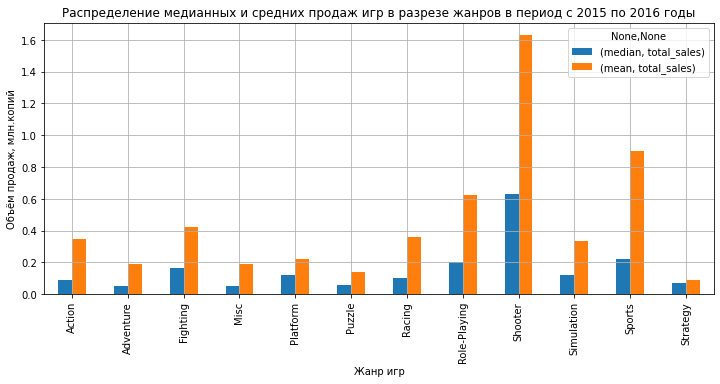

In [31]:
genres = top_platform.pivot_table(
    index='genre', values=['total_sales'], aggfunc=['median', 'mean'])
display(genres)
genres.plot(grid=True, figsize=(12,5), kind='bar')
plt.title('Распределение медианных и средних продаж игр в разрезе жанров в период с 2015 по 2016 годы')
plt.xlabel('Жанр игр')
plt.ylabel('Объём продаж, млн.копий');

Диаграмма подтверждает успешность жанра "Shooter" на рынке игр. Можно отметить также стабильность достаточно высоких продаж у жанров "Sports", "Role-Playing" и "Fighting". А вот по жанру "Action" можно как раз заметить, что высокий уровень глобальных продаж обусловлен большим количеством игр, представленных на рынке, медианный и средний уровень продаж которых не стремится к лидирующим позициям.

### Вывод
Мы определили, что широкое развитие сфера игропроизводства начала получать примерно с 1995 года. Пик её развития пришёлся на 2008 год. Мы изучили динамику появления новых платформ и определили, что жизненный цикл платформы в среднем 8-10 лет.
Определили, что самыми перспективыми для 2017 года с точки зрения продаж выглядят "XOne" и "PS4", так как это самые "молодые" платформы с самыми высокими продажами.

Изучили влияние на продажи внутри лидирующих платформ отзывов пользователей и критиков. Предварительно избавившись от "выбросов" в данных обнаружили достаточно явную связь между глобальными продажами игр внутри платформы "PS4" и оценками критиков. Коэффициент корреляции между продажами игр и оценками пользователей очень невысокий, можно сделать вывод, что их влияние незначительно. Связь между глобальными продажами игр внутри платформы "3DS" и оценками критиков немного слабее,чем на платформе "PS4", и гораздо более явная связь присутствует с оценками пользователей. В случае платформы "XOne" картина связей очень похожа на ту, что демонстрирует нам выборка "PS4".

Самыми продаваемыми оказались игры в жанре "Action". Данный сегмент игрового рынка представлен самым большим разнообразием игр. Лидирующие позиции по уровню глобальных продаж также занимают жанры "Shooter", "Role-Playing" и "Sports".

Самыми непопулярными жанрами игр являются "Strategy" и "Puzzle". Эти же жанры в меньшей степени представлены в игровом разнообразии. Самым выгодным жанром можно назвать "Shooter", так как каждая игра,представленная на рынке в среднем здесь приносит более 2,7 миллиона проданных копий, что больше, чем по любому другому жанру.

Однако высокий уровень глобальных продаж игр того или иного жанра не всегда говорит о стабильности этих продаж. За высокими показателями может быть спрятано множество неудачных игр с небольшими продажами. Чтобы определить жанр игр, который стабильно приносит высокий доход, мы изучили медианные и средние продажи игр в разрезе жанров. Медианные и средние продажи подтверждили успешность жанра "Shooter" на рынке игр. Можно отметить также стабильность достаточно высоких продаж у жанров "Sports", "Role-Playing" и "Fighting". А вот по жанру "Action" можно как раз заметить, что высокий уровень глобальных продаж обусловлен большим количеством игр, представленных на рынке, медианный и средний уровень проаж которых не стремится к лидирующим позициям.

<a id='portrait'></a>
## Портрет пользователя каждого региона
Составим портрет пользователя каждого региона. Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Для этого сгруппируем данные о региональных продажах по платформам:

In [32]:
period = df[df['year_of_release'] >= 2015]
region_sales_plat= period.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
# для большей наглядности перевернём таблицу
display(region_sales_plat.T)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
eu_sales,7.39,9.10,7.30,83.54,0.00,1.08,0.73,6.49,4.21,28.10
jp_sales,23.55,0.00,4.97,12.05,0.12,8.41,0.00,4.12,0.00,0.18
na_sales,10.31,3.72,5.66,63.86,0.00,0.54,0.49,8.86,8.05,50.30


Можно заметить общие названия в лидирующих позициях платформ на рынке игр Северной Америки и Европы, а вот в Японии лидируют иные наименования. Изобразим результат нашей группировки в виде столбчатой диаграммы:

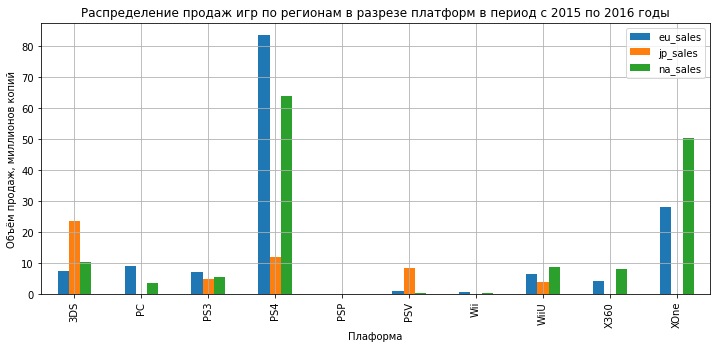

In [33]:
#Напишем функцию, которая построит столбчатую диаграмму продаж регионов
def bar_plot(data, name, name_x, name_y):
    data.plot(grid=True, figsize=(12,5), kind='bar')
    plt.title(name)
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    plt.show();
bar_plot(
    region_sales_plat, 'Распределение продаж игр по регионам в разрезе платформ в период с 2015 по 2016 годы', 
    'Плаформа', 'Объём продаж, миллионов копий')

Итак, в результате топ-5 платформ по регионам выглядит следующим образом:
   - Европа (PS4, XOne, PC, PS3, 3DS),
   - Япония (3DS, PS4, PSV, PS3, WiiU),
   - Северная Америка (PS4, XOne, 3DS, WiiU, X360).

Лидирующую позицию в Европе и Северной Америке по уровню продаж в период с 2015 по 2016 годы заняла платформа PS4. Было продано 83.54 и 63.86 млн.копий игр соответственно. В Японии же в указанный период наибольшей популярностью пользовалась платформа 3DS, для которой было продано 23.55 млн.копий игр.  
Однако абсолютные цифры о количестве проданных копий не дают нам полноценно судить о структуре продаж, которая сложилась в том или ином регионе в разрезе платформ. Чтобы это понять, рассчитаем долю продаж по платформам в отношении ко всем продажам региона:

In [34]:
#рассчитаем суммарные продажи по регионам в исследуемый период
na_sales = period['na_sales'].sum()
jp_sales = period['jp_sales'].sum()
eu_sales = period['eu_sales'].sum()
# добавим в таблицу расчет доли региональных продаж по каждой платформе в отношении к общим продажам по региону
region_sales_plat['percent_na_sales'] = (region_sales_plat['na_sales']/na_sales)*100
region_sales_plat['percent_jp_sales'] = (region_sales_plat['jp_sales']/jp_sales)*100
region_sales_plat['percent_eu_sales'] = (region_sales_plat['eu_sales']/eu_sales)*100
percent_plat = region_sales_plat[['percent_eu_sales', 'percent_jp_sales', 'percent_na_sales']]
display(percent_plat.T)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
percent_eu_sales,4.995268,6.151142,4.934433,56.468839,0.000000,0.730026,0.493443,4.386914,2.845748,18.994187
percent_jp_sales,44.101124,0.000000,9.307116,22.565543,0.224719,15.749064,0.000000,7.715356,0.000000,0.337079
percent_na_sales,6.792279,2.450754,3.728836,42.071283,0.000000,0.355755,0.322814,5.837012,5.303380,33.137888


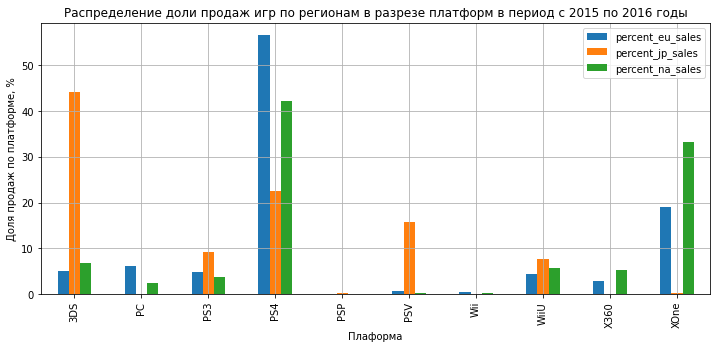

In [35]:
bar_plot(
    percent_plat, 'Распределение доли продаж игр по регионам в разрезе платформ в период с 2015 по 2016 годы', 
    'Плаформа', 'Доля продаж по платформе, %')

Большая часть пользователей в Японии (а именно 44.10%) выбирали платформу 3DS. Выбор в пользу платформ PS3, PSV, PS4 и WiiU делали от 7.71 до 22.56% пользователей.  
В Европе с большим преимуществом лидировала платформа PS4, её выбирали 56.47% пользователей. В Северной Америке большинство пользователей делали выбор в пользу платформ PS4 (42.07%) и XOne (33.14%).

Далее интересно узнать, каковы жанровые предпочтения игрового рынка в сравниваемых регионах. Для этого сгруппируем данные о региональных продажах по жанрам и построим столбчатые диаграммы:

In [36]:
region_sales_genre = period.pivot_table(
    index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
display(region_sales_genre.T)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
eu_sales,34.82,4.67,3.72,4.26,3.20,0.13,6.52,17.21,40.28,3.74,27.82,1.57
jp_sales,23.05,2.22,1.54,3.19,1.42,0.52,0.29,13.41,3.79,1.93,1.65,0.39
na_sales,33.68,3.84,5.54,5.58,3.78,0.06,2.82,19.82,48.18,1.36,26.31,0.82


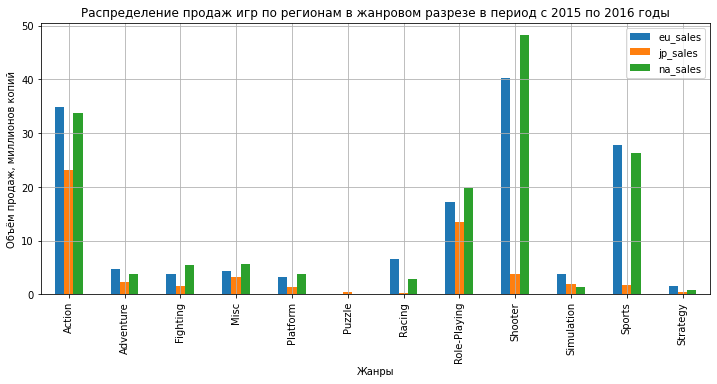

In [37]:
bar_plot(
    region_sales_genre, 'Распределение продаж игр по регионам в жанровом разрезе в период с 2015 по 2016 годы', 
    'Жанры', 'Объём продаж, миллионов копий')

Итак, в результате топ-5 жанров по регионам выглядит следующим образом:
   - Европа (Action, Shooter, Sports, Role-Playing, Racing),
   - Япония (Role-Playing, Action, Misc, Fighting, Shooter),
   - Северная Америка (Action, Shooter, Sports, Role-Playing, Misc).

Жанровые предпочтения в Европе и Северной Америке в период с 2015 по 2016 годы оказались очень схожими - наиболее популярые жанры здесь Action, Shooter и Sports. Продажи игр в жанре Action были на уровне 34.82 млн. копий в Европе и 33.68 млн. копий в Северной Америке. В Японии же в указанный период наибольшей популярностью пользовались игры в жанре Role-Playing, которых было продано 13.41 млн.копий.  
Чтобы полноценно судить о структуре продаж, которая сложилась в том или ином регионе в жанровом разрезе, рассчитаем долю продаж по каждому жанру в отношении ко всем продажам региона:

In [38]:
# добавим в таблицу расчет доли региональных продаж по каждой платформе в отношении к общим продажам по региону
region_sales_genre['percent_na_sales'] = (region_sales_genre['na_sales']/na_sales)*100
region_sales_genre['percent_jp_sales'] = (region_sales_genre['jp_sales']/jp_sales)*100
region_sales_genre['percent_eu_sales'] = (region_sales_genre['eu_sales']/eu_sales)*100
percent_genre = region_sales_genre[['percent_eu_sales', 'percent_jp_sales', 'percent_na_sales']]
display(percent_genre.T)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
percent_eu_sales,23.536569,3.156685,2.514533,2.879546,2.163039,0.087873,4.407192,11.633094,27.227254,2.528052,18.804921,1.061241
percent_jp_sales,43.164794,4.157303,2.883895,5.973783,2.659176,0.973783,0.543071,25.112360,7.097378,3.614232,3.089888,0.730337
percent_na_sales,22.188550,2.529811,3.649779,3.676131,2.490283,0.039528,1.857830,13.057514,31.741221,0.895975,17.333158,0.540220


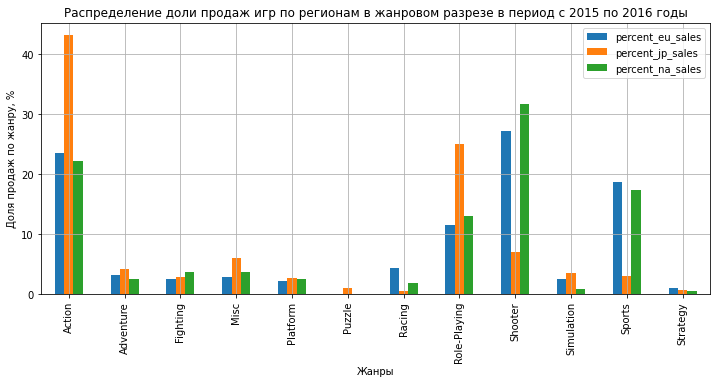

In [39]:
bar_plot(
    percent_genre, 'Распределение доли продаж игр по регионам в жанровом разрезе в период с 2015 по 2016 годы', 
    'Жанры', 'Доля продаж по жанру, %')

Предпочтения японцев более очевидны: 43.16% пользователей предпочитают игры в жанре Action и 25.11% - Role-Playing. Около 23.53% пользователей Европы и 22.19% пользователей Северной Америки делали выбор в пользу игр жанра Action. 27.23% и 31.74% пользователей предпочитали игры жанра Shooter в Еропе и Северной Америке соответственно.

Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе? Для этого сгруппируем жанры по рейтингу в разрезе регионов:

In [40]:
esrb = period.pivot_table(
    index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
display(esrb.T)

rating,E,E10+,M,T,nd
eu_sales,34.83,11.54,45.54,20.32,35.71
jp_sales,5.25,3.27,4.29,7.70,32.89
na_sales,26.59,17.87,47.03,22.86,37.44


В нашей таблице нашли отражение 4 категории рейтинга ESRB, а именно:
- **E ("Everyone")** - "Для всех",
- **E10+ ("Everyone 10 and older")** - "Для всех от 10 лет и старше",
- **T ("Teen")** - "Подросткам",
- **M ("Mature")** - "Для взрослых".

Кроме того, большой сегмент данных составили игры без рейтинга ESRB ('nd' - 'not determined').

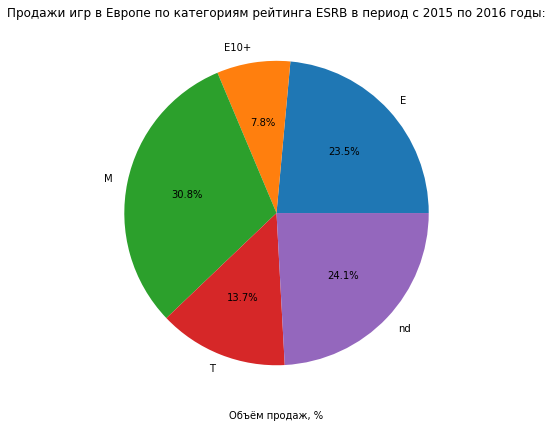

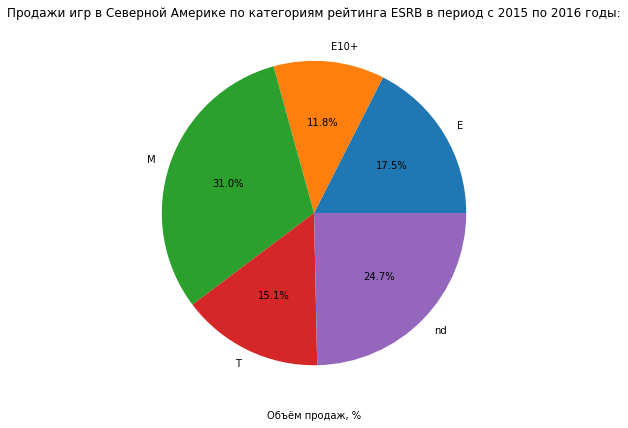

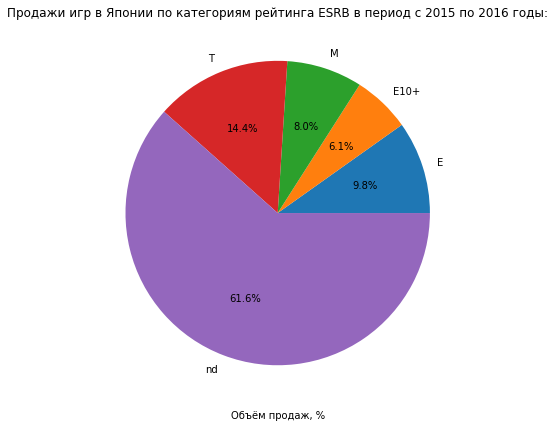

In [41]:
#Напишем функцию, которая построит круговую диаграмму продаж региона по разным категориям рейтинга ESRB
def pie_plot(data, region, name):
    data.groupby(['rating'])[region].sum().plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', pctdistance=0.6)
    plt.title(name)
    plt.xlabel('Объём продаж, %')
    plt.ylabel(' ')
    plt.show();
pie_plot(period, 'eu_sales', 'Продажи игр в Европе по категориям рейтинга ESRB в период с 2015 по 2016 годы:')
print ('')
pie_plot(period, 'na_sales', 'Продажи игр в Северной Америке по категориям рейтинга ESRB в период с 2015 по 2016 годы:')
print ('')
pie_plot(period, 'jp_sales', 'Продажи игр в Японии по категориям рейтинга ESRB в период с 2015 по 2016 годы:')

Итак, возрастная структура игрового сообщества в Европе и Северной Америке схожи: большинство геймеров здесь - взрослые люди. В Японии же это подростки. Наименьший сегмент во всех трёх исследуемых регионах остался за категорией "Для всех от 10 лет и старше".  
Можно заметить, что игры без рейтинга ESRB занимают большой удельный вес в общих продажах. В Европе и Северной Америке около 24%, а в Японии так и вовсе почти 62%.

### Вывод
Мы проанализировали структуру рынка игровой индустрия в трёх регионах: Европе, Северной Америке и Японии. Таким образом, мы составили портреты типичного пользователя каждого региона:
- **Европа** - взрослый человек, предпочитающий платформу PS4 и игры в жанре Action,
- **Северная Америка** - взрослый человек, предпочитающий платформы PS4 или XOne и игры в жанрах Action или Shooter,
- **Япония** - подросток, который использует платформу 3DS и предпочитает игры в жанре Role-Playing или Action.

Структуры игрового рынка в Европе и Северной Америке во многом похожи, а вот Япония сильно отличается.

<a id='hipothesis'></a>
## Описание распределений. Проверка гипотез
Нам предстоит проверить гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Для начала взглянем на описательные характеристики наших данных в разрезе платформ. Рассмотрим всё тот же период с 2015 по 2016 годы:

In [42]:
period.pivot_table(index= 'platform', values= 'user_score', aggfunc= ['mean', 'var','std'])

,mean,var,std
,user_score,user_score,user_score
platform,,,
3DS,7.503030,0.952178,0.975796
PC,6.296429,3.110951,1.763789
PS3,5.551429,3.954336,1.988551
PS4,6.852105,2.152985,1.467305
PSV,7.808333,0.704786,0.839515
WiiU,7.044828,2.142562,1.463749
X360,5.390323,3.783570,1.945140
XOne,6.542149,2.125792,1.458010


Стандартное отклонение и дисперсия показывают, что разброс данных по выборке платформы PC больше, чем платформы XOne. Расхождения средних пользовательских рейтингов небольшие. Сохраним срезы данных по каждой из анализирумых платформ в отдельные переменные и проверим данные на "нормальность" распределения, построив гистограмму:

Количество наблюдений по платформе PC -  84
Количество наблюдений по платформе XOne -  121


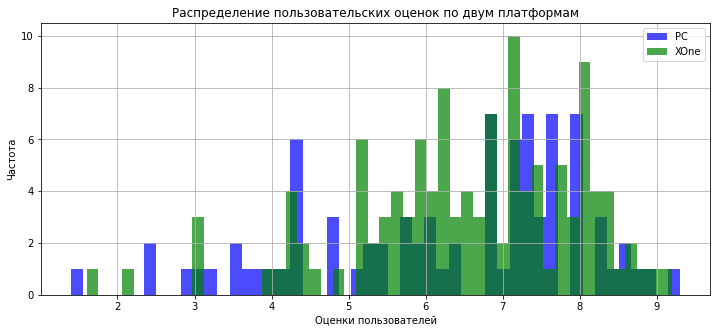

In [43]:
pc_compare = period[(period['platform'] == 'PC')&(period['user_score'].isna() == False)]
print('Количество наблюдений по платформе PC - ', len(pc_compare))
xone_compare = period[(period['platform'] == 'XOne')&(period['user_score'].isna() == False)]
print('Количество наблюдений по платформе XOne - ', len(xone_compare))
ax = pc_compare['user_score'].plot(bins=50, alpha=0.7, kind='hist', label='PC', legend=True, color='blue')
xone_compare['user_score'].plot(
    bins=50, alpha=0.7, ax=ax, kind='hist', label='XOne', grid=True, figsize=(12,5), legend=True, color='green');
plt.title('Распределение пользовательских оценок по двум платформам')
plt.xlabel('Оценки пользователей')
plt.ylabel('Частота');

Распределение пользовательских оценок по двум платформам похоже на нормальное. Также стоит отметить, что наблюдений в полученных выборках достаточно для того, чтобы датасет из средних значений выборок был нормально распределён вокруг среднего всей совокупности. Таким образом, мы убедились в том, что можем переходить к следующему шагу нашего исследования: формулированию гипотез и проведению статистического теста.

Cформулируем следующие гипотезы для проверки:  
**H_0**: средние пользовательские рейтинги платформ Xbox One и PC равны,  
**H_1**: средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Так как мы имеем дело с двумя независимыми выборками, то для проверки гипотез будем использовать метод ttest_ind():

In [44]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(pc_compare['user_score'], xone_compare['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


В результате проведенного статитического теста мы получили высокий уровень значимости - 28% (больше выбранного нами критического уровня значимости в 5 %). Мы не смогли отвергнуть нулевую гипозезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC (то есть разницу между средними пользовательскими рейтингами платформ Xbox One и PC мы не можем считать статистически значимой).

На заключительном этапе исследования нам предстоит проверить гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Начнём с описательных характеристик:

In [45]:
period.pivot_table(index= 'genre', values= 'user_score', aggfunc= ['mean', 'var','std'])

,mean,var,std
,user_score,user_score,user_score
genre,,,
Action,6.808290,1.813056,1.346498
Adventure,7.685294,0.950989,0.975187
Fighting,6.886957,2.164822,1.471333
Misc,6.658333,1.544275,1.242689
Platform,6.245000,3.525763,1.877702
Puzzle,7.766667,0.303333,0.550757
Racing,6.610714,2.962474,1.721184
Role-Playing,7.772727,0.787576,0.887455


Стандартное отклонение и дисперсия показывают, что разброс данных по выборке жанра Sports больше, чем жанра Action. Расхождения средних пользовательских рейтингов заметны (по играм в жанре Action они выше). Сохраним срезы данных по каждому из анализирумых жанров в отдельные переменные и проверим данные на "нормальность" распределения, построив гистограмму:

Количество наблюдений по жанру Action -  193
Количество наблюдений по жанру Sports -  82


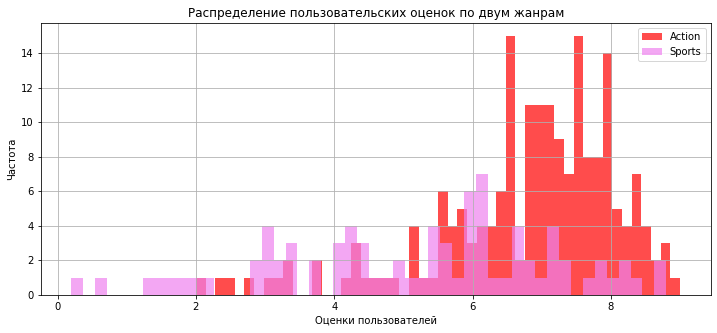

In [46]:
action_compare = period[(period['genre'] == 'Action')&(period['user_score'].isna() == False)]
print('Количество наблюдений по жанру Action - ', len(action_compare))
sports_compare = period[(period['genre'] == 'Sports')&(period['user_score'].isna() == False)]
print('Количество наблюдений по жанру Sports - ', len(sports_compare))
ax = action_compare['user_score'].plot(bins=50, alpha=0.7, kind='hist', label='Action', legend=True, color='red')
sports_compare['user_score'].plot(
    bins=50, alpha=0.7, ax=ax, kind='hist', label='Sports', grid=True, figsize=(12,5), legend=True, color='violet');
plt.title('Распределение пользовательских оценок по двум жанрам')
plt.xlabel('Оценки пользователей')
plt.ylabel('Частота');

Распределение пользовательских оценок по двум жанрам похоже на нормальное. Также стоит отметить, что наблюдений в полученных выборках достаточно для того, чтобы датасет из средних значений выборок был нормально распределён вокруг среднего всей совокупности. Таким образом, мы убедились в том, что можем переходить к следующему шагу нашего исследования: формулированию гипотез и проведению статистического теста.

Cформулируем следующие гипотезы для проверки:  
**H_0**: средние пользовательские рейтинги жанров Action и Sports равны,  
**H_1**: средние пользовательские рейтинги жанра Action больше, чем жанра Sports (выдвинем одностороннюю гипотезу, так как по значениям средних величин мы видим в какую сторону разница).

Так как мы имеем дело с двумя независимыми выборками, то для проверки гипотез будем использовать метод ttest_ind():

In [47]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(action_compare['user_score'], sports_compare['user_score'])

# тест односторонний: p-value необходимо разделить на 2
print('p-значение:', results.pvalue/2)

# тест односторонний вправо:
# отвергаем нулевую гипотезу только если среднее выборки "Action" значимо больше среднего выборки "Sports"
if (results.pvalue/2 < alpha) and (action_compare['user_score'].mean() > sports_compare['user_score'].mean()):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.006423403969328e-14
Отвергаем нулевую гипотезу


Полученные расчеты позволяют отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports в пользу альтернативной гипотезы: средние пользовательские рейтинги жанра Action больше, чем у жанра Sports.

### Вывод

В заключительной части нашего исследования мы проверили две гипотезы: о равенстве средних пользовательских рейтингов платформ Xbox One и PC, о различии средних пользовательских рейтингов жанров Action и Sports.

В первом случае мы не смогли отвергнуть нулевую гипозезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC (то есть разницу между средними пользовательскими рейтингами платформ Xbox One и PC мы не можем считать статистически значимой).

Во втором случае мы в качестве альтернативной выдвинули одностороннюю гипотезу, так как по значениям средних величин было видно, в какую сторону между ними разница. Полученные расчеты позволили отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports в пользу альтернативной гипотезы: средние пользовательские рейтинги жанра Action больше, чем у жанра Sports.

<a id='total_conclusion'></a>
## Общий вывод

В текущем исследовании нам необходимо было изучить рынок компьютерных игр. Мы изучили динамику выпуска игр в трёх регионах (Европе, Северной Америке и Японии) и выяснили, что широкое развитие сфера игропроизводства начала получать примерно с 1995 года. Пик её развития пришёлся на 2008 год. Проследили обновление всех топовых платформ: в 2000-м появилось две платформы (спустя 5 лет от запуска "PS"), ещё две платформы появились в 2004-м, в 2006 ещё две, в 2011-м одна и в 2013-м ещё одна. Жизненный цикл платформы в среднем 8-10 лет. Выявили самые перспективные для 2017 года платформы и жанры игр. Платформа "3DS" в 2015 году начала терять продажи, но они всё ещё оставалисьдостаточно высокими - больше 27.78 млн.копий. Можно полагать, что ближайшие пару лет большого падения продаж игр для этой платформы не произойдёт. Самыми перспективыми для 2017 года с точки зрения продаж выглядят "XOne" и "PS4", так как это самые "молодые" платформы с самыми высокими продажами.

Изучили влияние на продажи внутри ведущих платформ отзывов пользователей и критиков. Определили достаточно явную связь между глобальными продажами игр внутри платформы "PS4" и оценками критиков. Коэффициент корреляции между продажами игр и оценками пользователей очень невысокий, из чего можно сделать вывод, что их влияние незначительно. Связь между глобальными продажами игр внутри платформы "3DS" и оценками критиков немного слабее,чем на платформе "PS4", и гораздо более явная связь присутствует с оценками пользователей. В случае платформы "XOne" картина связей очень похожа на ту, что демонстрирует нам выборка "PS4".

Самыми продаваемыми оказались игры в жанре "Action". Данный сегмент игрового рынка представлен самым большим разнообразием игр. Лидирующие позиции по уровню глобальных продаж также занимают жанры "Shooter", "Role-Playing" и "Sports". Самыми непопулярными жанрами игр являются "Strategy" и "Puzzle". Эти же жанры в меньшей степени представлены в игровом разнообразии. Самым выгодным жанром можно назвать "Shooter", так как каждая игра,представленная на рынке в среднем здесь приносит более 2,7 миллионов проданных копий, что больше, чем по любому другому жанру.

Однако высокий уровень глобальных продаж игр того или иного жанра не всегда говорит о стабильности этих продаж. За высокими показателями может быть спрятано множество неудачных игр с небольшими продажами. Чтобы определить жанр игр, который стабильно приносит высокий доход, мы изучили медианные и средние продажи игр в разрезе жанров. Медианные и средние продажи подтверждили успешность жанра "Shooter" на рынке игр. Можно отметить также стабильность достаточно высоких продаж у жанров "Sports", "Role-Playing" и "Fighting". А вот по жанру "Action" можно как раз заметить, что высокий уровень глобальных продаж обусловлен большим количеством игр, представленных на рынке, медианный и средний уровень проаж которых не стремится к лидирующим позициям.

Итак, в результате топ-5 платформ по регионам выглядит следующим образом:
   - Европа (PS4, XOne, PC, PS3, 3DS),
   - Япония (3DS, PS4, PSV, PS3, WiiU),
   - Северная Америка (PS4, XOne, 3DS, WiiU, X360).

Лидирующую позицию в Европе и Северной Америке по уровню продаж в период с 2015 по 2016 годы заняла платформа PS4. Было продано 83.54 и 63.86 млн.копий игр соответственно. В Японии же в указанный период наибольшей популярностью пользовалась платформа 3DS, для которой было продано 23.55 млн.копий игр.  
Однако абсолютные цифры о количестве проданных копий не дают нам полноценно судить о структуре продаж, которая сложилась в том или ином регионе в разрезе платформ.  
Большая часть пользователей в Японии (а именно 44.10%) выбирали платформу 3DS. Выбор в пользу платформ PS3, PSV, PS4 и WiiU делали от 7.71 до 22.56% пользователей.
В Европе с большим преимуществом лидировала платформа PS4, её выбирали 56.47% пользователей. В Северной Америке большинство пользователей делали выбор в пользу платформ PS4 (42.07%) и XOne (33.14%).

Итак, в результате топ-5 жанров по регионам выглядит следующим образом:
   - Европа (Action, Shooter, Sports, Role-Playing, Racing),
   - Япония (Role-Playing, Action, Misc, Fighting, Shooter),
   - Северная Америка (Action, Shooter, Sports, Role-Playing, Misc).

Жанровые предпочтения в Европе и Северной Америке в период с 2015 по 2016 годы оказались очень схожими - наиболее популярые жанры здесь Action, Shooter и Sports. Продажи игр в жанре Action были на уровне 34.82 млн. копий в Европе и 33.68 млн. копий в Северной Америке. В Японии же в указанный период наибольшей популярностью пользовались игры в жанре Role-Playing, которых было продано 13.41 млн.копий.  
Предпочтения японцев более очевидны: 43.16% пользователей предпочитают игры в жанре Action и 25.11% - Role-Playing. Около 23.53% пользователей Европы и 22.19% пользователей Северной Америки делали выбор в пользу игр жанра Action. 27.23% и 31.74% пользователей предпочитали игры жанра Shooter в Еропе и Северной Америке соответственно.

Изучили влияние рейтинга ESRB на продажи в отдельном регионе. Возрастная структура игрового сообщества в Европе и Северной Америке схожи: большинство геймеров здесь - взрослые люди. В Японии же это подростки. Наименьший сегмент во всех трёх исследуемых регионах остался за категорией "Для всех от 10 лет и старше".  

Нами были сформулированы следующие гипотезы для проверки:  
**H_0**: средние пользовательские рейтинги платформ Xbox One и PC равны,  
**H_1**: средние пользовательские рейтинги платформ Xbox One и PC отличаются.

В результате проведенного статитического теста мы получили высокий уровень значимости - 28% (больше выбранного нами критического уровня значимости в 5 %). Мы не смогли отвергнуть нулевую гипозезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC (то есть разница между средними пользовательскими рейтингами платформ Xbox One и PC не является статистически значимой).

На заключительном этапе исследования мы проверили гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нами были сформулированы следующие гипотезы для проверки:  
**H_0**: средние пользовательские рейтинги жанров Action и Sports равны,  
**H_1**: средние пользовательские рейтинги жанра Action больше, чем жанра Sports (выдвинем одностороннюю гипотезу, так как по значениям средних величин мы видим в какую сторону разница).

Полученные расчеты позволили отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports в пользу альтернативной гипотезы: средние пользовательские рейтинги жанра Action больше, чем жанра Sports.

Текущее исследование можно развить. Например, можно определить несколько самых популярных игр, изучить какие жанры они представляют, для каких платформ выпускались и сравнить их продажи по регионам. Также можно сравнить продажи в разрезе игр, жанров и платформ в рамках каждой возрастной категории. Сравнить предпочтения взрослых и подростков, к примеру.